# CAPE Data EDA

In [1]:
%pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /Users/scottyang/opt/anaconda3/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

In [3]:
cape = pd.read_csv("CAPE_all.csv")
cape.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
0,"Jones, Ian William Nasser",ANAR 120 - Documenting Climate Change (A),FA20,15.0,4.0,100.00%,100.00%,2.50,B+ (3.50),NaN
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),FA20,17.0,6.0,100.00%,100.00%,6.50,A (4.00),NaN
2,"D'Alpoim Guedes, Jade A",ANAR 146 - Feeding the World (A),FA20,41.0,16.0,100.00%,100.00%,4.00,A- (3.81),A- (3.79)
3,"Fox, Patrick Keolu Ozer",ANBI 118 - Technology on the Go (A),FA20,20.0,15.0,93.30%,100.00%,2.77,B+ (3.67),A- (3.77)
4,"Fox, Patrick Keolu Ozer",ANBI 121 - Polynesian Navigation (A),FA20,14.0,10.0,100.00%,100.00%,2.72,B+ (3.67),NaN


In [4]:
cape.shape

(50505, 10)

## Data Cleaning parse out course code and course description

In [5]:
cape['Course'][0].split('-') # need[0] so that we can operate spilt on it

['ANAR 120 ', ' Documenting Climate Change (A)']

In [6]:
cape = cape.assign(course_code = cape['Course'].apply(lambda course: str(course).split('-')[0][:-1]))
cape = cape.assign(department = cape["course_code"].apply(lambda code: str(code).split()[0]))
cape = cape.assign(course_num = cape["course_code"].apply(
    lambda code: str(code).split()[1] 
    if len(str(code).split()) == 2 else code))
cape = cape.assign(course_description = cape['Course'].apply(
    lambda course: str(course).split('-')[1] if len(str(course).split('-')) == 2 else course))

In [7]:
cape.columns

Index(['Instructor', 'Course', 'Term', 'Enroll', 'Evals Made', 'Rcmnd Class',
       'Rcmnd Instr', 'Study Hrs/wk', 'Avg Grade Expected',
       'Avg Grade Received', 'course_code', 'department', 'course_num',
       'course_description'],
      dtype='object')

## Clean out the Avg Grade Expected and Avg Grade Received
I will create a new dataFrame for this analysis called `grade`

First, clean out the unrelated factor and drop the coloumn of grades where have `NaN` value.

In [8]:
grade = cape[['Instructor', 'Course', 'Term', 'Study Hrs/wk', 'Avg Grade Expected', 'Avg Grade Received']][
    (cape["Avg Grade Expected"].notna()) & (cape["Avg Grade Received"].notna())
]
grade.head()

,Instructor,Course,Term,Study Hrs/wk,Avg Grade Expected,Avg Grade Received
2,"D'Alpoim Guedes, Jade A",ANAR 146 - Feeding the World (A),FA20,4.00,A- (3.81),A- (3.79)
3,"Fox, Patrick Keolu Ozer",ANBI 118 - Technology on the Go (A),FA20,2.77,B+ (3.67),A- (3.77)
5,"Semendeferi, Ekaterini",ANBI 136 - Human Comparative Neuroanatomy (A),FA20,5.17,B (3.27),B- (2.99)
6,"Gagneux, Pascal",ANBI 141 - The Evolution of Human Diet (A),FA20,3.75,B+ (3.70),A- (3.87)
9,"Olivas Hernandez, Olga Lid",ANSC 121 - Psychological Anthropology (A),FA20,3.83,A- (3.77),A- (3.91)


In [9]:
grade['Avg Grade Expected'].iloc[0].split()

['A-', '(3.81)']

In [10]:
grade = grade.assign(
    GPA_Expected = grade['Avg Grade Expected'].apply(lambda grade: float(grade.split()[1][1:-1])),
    GPA_Received = grade['Avg Grade Received'].apply(lambda grade: float(grade.split()[1][1:-1])),
    letter_Recieved = grade['Avg Grade Received'].apply(lambda grade: grade.split()[0])
)

grade.head()

,Instructor,Course,Term,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,GPA_Expected,GPA_Received,letter_Recieved
2,"D'Alpoim Guedes, Jade A",ANAR 146 - Feeding the World (A),FA20,4.00,A- (3.81),A- (3.79),3.81,3.79,A-
3,"Fox, Patrick Keolu Ozer",ANBI 118 - Technology on the Go (A),FA20,2.77,B+ (3.67),A- (3.77),3.67,3.77,A-
5,"Semendeferi, Ekaterini",ANBI 136 - Human Comparative Neuroanatomy (A),FA20,5.17,B (3.27),B- (2.99),3.27,2.99,B-
6,"Gagneux, Pascal",ANBI 141 - The Evolution of Human Diet (A),FA20,3.75,B+ (3.70),A- (3.87),3.70,3.87,A-
9,"Olivas Hernandez, Olga Lid",ANSC 121 - Psychological Anthropology (A),FA20,3.83,A- (3.77),A- (3.91),3.77,3.91,A-


### Is there a relationship between GPA Expected and GPA Recieve?

Text(0.5, 1.0, 'Positive Corrolation Between GPA Expected and GPA Received')

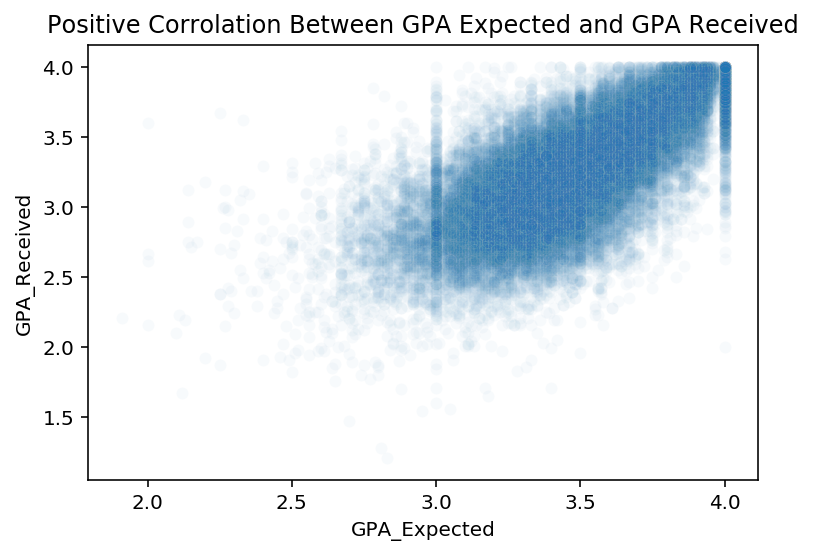

In [11]:
gpa_sub = grade[['GPA_Expected', 'GPA_Received']].reset_index()
ax = sns.scatterplot(x='GPA_Expected', y='GPA_Received', data=gpa_sub, alpha=0.03)
ax.set_title("Positive Corrolation Between GPA Expected and GPA Received")

Again, there are too many data point. Let's limit our scope with `FA20` and `FA19`

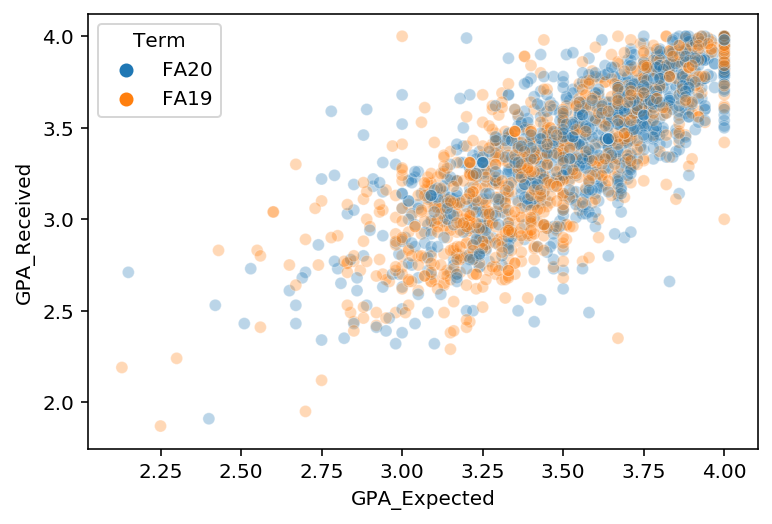

In [12]:
grade_FA = grade[grade['Term'].apply(lambda term: term in ["FA20", "FA19"])]
sns.scatterplot(x='GPA_Expected', y='GPA_Received', hue="Term", data=grade_FA, alpha=0.3)

Scatter plot cannot differentiate those two. Let's do a Histogram

#### Difference between the expected value and Received Value

Text(0.5, 1.0, 'FA20 Student predict their grade more accurate than FA19')

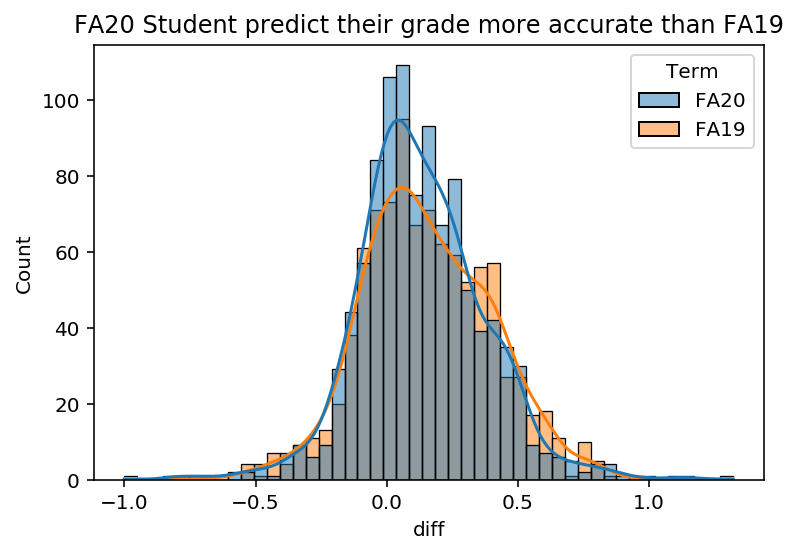

In [13]:
grade_FA_diff = grade_FA.assign(diff = grade_FA['GPA_Expected'] - grade_FA['GPA_Received'])
ax = sns.histplot(x='diff', hue='Term', data=grade_FA_diff, kde=True)
ax.set_title("FA20 Student predict their grade more accurate than FA19")

From that graph, we can see that student tend to over-estimate their own GPA.

## Evalutation percentage
We could calculate the percentage of response of each class of student. That is calculated by dividing the `Enroll` by the `Evals Mades` columns

In [14]:
cape = cape.assign(eval_percent = cape['Evals Made'] / cape['Enroll'])
cape.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,course_code,department,course_num,course_description,eval_percent
0,"Jones, Ian William Nasser",ANAR 120 - Documenting Climate Change (A),FA20,15.0,4.0,100.00%,100.00%,2.50,B+ (3.50),NaN,ANAR 120,ANAR,120,Documenting Climate Change (A),0.266667
1,"Smith, Neil Gordon",ANAR 121 - Cyber-Archaeology (A),FA20,17.0,6.0,100.00%,100.00%,6.50,A (4.00),NaN,ANAR 121,ANAR,121,ANAR 121 - Cyber-Archaeology (A),0.352941
2,"D'Alpoim Guedes, Jade A",ANAR 146 - Feeding the World (A),FA20,41.0,16.0,100.00%,100.00%,4.00,A- (3.81),A- (3.79),ANAR 146,ANAR,146,Feeding the World (A),0.390244
3,"Fox, Patrick Keolu Ozer",ANBI 118 - Technology on the Go (A),FA20,20.0,15.0,93.30%,100.00%,2.77,B+ (3.67),A- (3.77),ANBI 118,ANBI,118,Technology on the Go (A),0.750000
4,"Fox, Patrick Keolu Ozer",ANBI 121 - Polynesian Navigation (A),FA20,14.0,10.0,100.00%,100.00%,2.72,B+ (3.67),NaN,ANBI 121,ANBI,121,Polynesian Navigation (A),0.714286


In [15]:
cape['eval_percent'].max()

9.0

Clearly There are some outlier here. Let's do the data cleaning when we plot the graph.

## EDA for the Response Rate

Text(0.5, 1.0, 'Most classes have 40% of Response Rate')

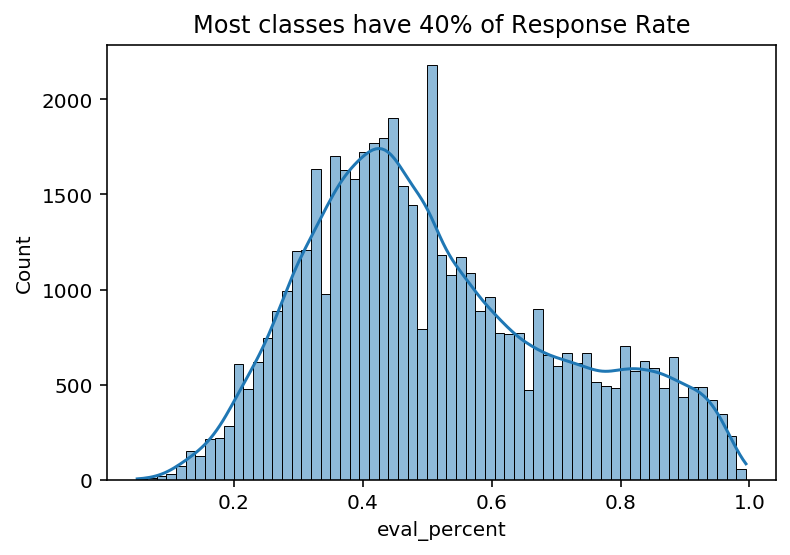

In [16]:
ax = sns.histplot(x='eval_percent', data=cape[cape['eval_percent'] < 1], kde=True)
ax.set_title("Most classes have 40% of Response Rate")

## Is the avg time spent different from department?

In [17]:
study_dept = cape[['Study Hrs/wk', 'department']].groupby("department").agg('mean').dropna()
study_dept.sort_values(by='Study Hrs/wk', ascending=False).head()

,Study Hrs/wk
department,
SE,8.306045
DSC,8.180000
ECE,8.093241
CSE,8.017569
MAE,7.820028


DSC is the second place lolll

In [18]:
study_dept.loc["COGS"]

Study Hrs/wk    5.347595
Name: COGS, dtype: float64

### Marina from DSC

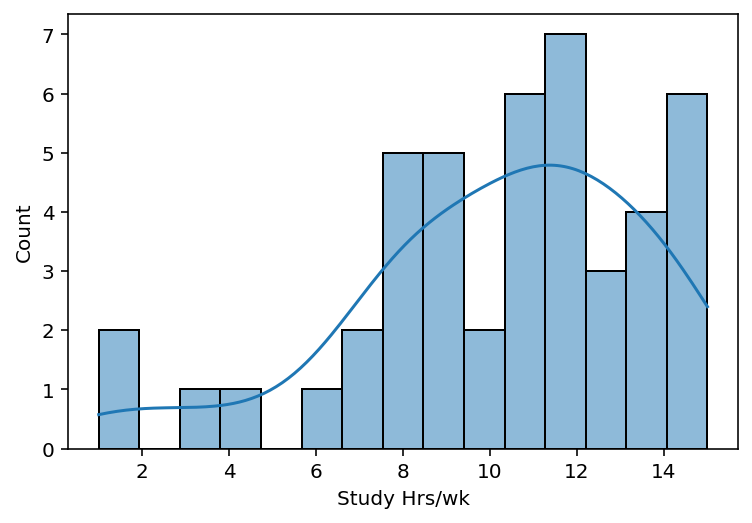

In [19]:
marina = cape[cape['Instructor'] == 'Langlois, Marina']
sns.histplot(x="Study Hrs/wk", data=marina, kde=True, bins=15)

## EDA for Study hours before and after pandemic

Text(0.5, 1.0, 'Average Hours spent Across the whole data')

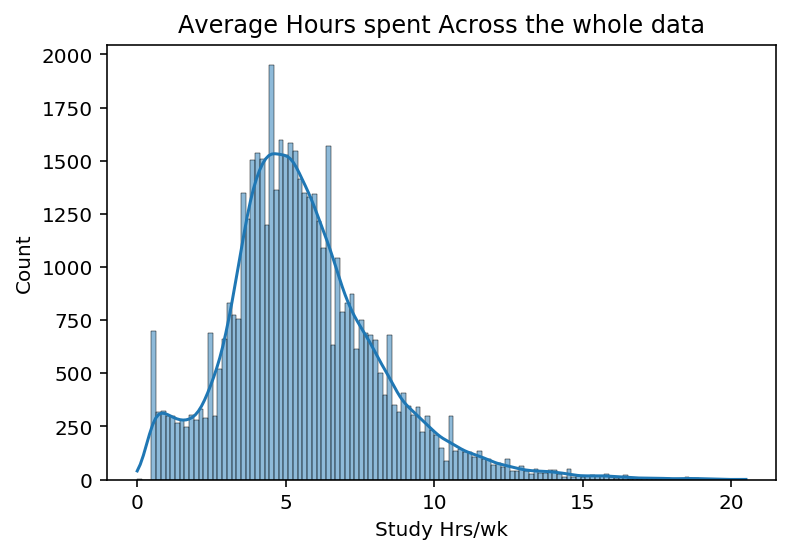

In [20]:
ax = sns.histplot(x='Study Hrs/wk', data=cape, kde=True)
ax.set_title("Average Hours spent Across the whole data")

Here, I only choose the two terms for comparison, `FA20` and `FA19`

In [21]:
sub_cape = cape[['Study Hrs/wk', 'Term']][
    [term in ['FA20', 'FA19'] for term in cape['Term']]
]
sub_cape.head()

,Study Hrs/wk,Term
0,2.50,FA20
1,6.50,FA20
2,4.00,FA20
3,2.77,FA20
4,2.72,FA20


Text(0.5, 1.0, 'Students in FA20 Spends more time than FA19')

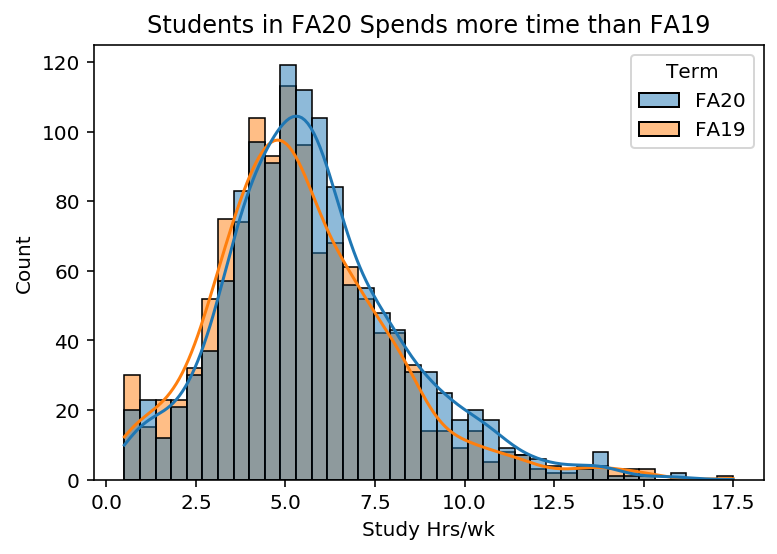

In [22]:
ax = sns.histplot(x = 'Study Hrs/wk', hue='Term', data=sub_cape, kde=True)
ax.set_title("Students in FA20 Spends more time than FA19")

# Average GPA difference before and after pandemic

In [23]:
cape['Avg Grade Expected']

0        B+ (3.50)
1         A (4.00)
2        A- (3.81)
3        B+ (3.67)
4        B+ (3.67)
           ...    
50500    B+ (3.59)
50501    B+ (3.43)
50502     B (3.29)
50503    B+ (3.44)
50504     B (3.29)
Name: Avg Grade Expected, Length: 50505, dtype: object

In [24]:
# a = gpa['avg_gpa'].isnull()
# a.value_counts()

In [25]:
float(cape['Avg Grade Expected'][0].split('(')[1][:-1])
float(cape['Avg Grade Expected'][1].split('(')[1][:-1])
float(cape['Avg Grade Expected'][50504].split('(')[1][:-1])

3.29

In [26]:
gpa = pd.DataFrame().assign(avg_gpa = cape['Avg Grade Expected'])
gpa = gpa.assign(
    avg_gpa = gpa['avg_gpa'].apply(lambda x: float(str(x).split('(')[1][:-1])
                    if len(str(x).split()) == 2 else x),
    term = cape['Term']
)
gpa.head()

,avg_gpa,term
0,3.50,FA20
1,4.00,FA20
2,3.81,FA20
3,3.67,FA20
4,3.67,FA20


In [27]:
gpa['avg_gpa'].mean()

3.5184364303179216

In [28]:
by_term = gpa.groupby('term').agg(['mean']).reset_index()
by_term.head()

,term,avg_gpa
,,mean
0,FA07,3.480995
1,FA08,3.507060
2,FA09,3.518623
3,FA10,3.519760
4,FA11,3.508741


In [29]:
allgpa = pd.DataFrame().assign(
    term = by_term['term'],
    gpa = by_term['avg_gpa']
)
allgpa.head()

,term,gpa
0,FA07,3.480995
1,FA08,3.507060
2,FA09,3.518623
3,FA10,3.519760
4,FA11,3.508741


In [30]:
fa19 = by_term[by_term['term'] == 'FA19']
fa20 = by_term[by_term['term'] == 'FA20']

In [31]:
fa = pd.merge(left = fa19, right = fa20, how = 'outer')
fa

,term,avg_gpa
,,mean
0,FA19,3.488312
1,FA20,3.577695


In [32]:
null = by_term['avg_gpa'].isna()
notvalid = null[null['mean'] == False]
na_count = notvalid.shape[0]
na_count

74

In [33]:
to_compare = pd.DataFrame().assign(
    term = fa['term'],
    gpa = fa['avg_gpa']
)
to_compare

,term,gpa
0,FA19,3.488312
1,FA20,3.577695


Text(0.5, 1.0, 'Average GPA in FA19 and FA20')

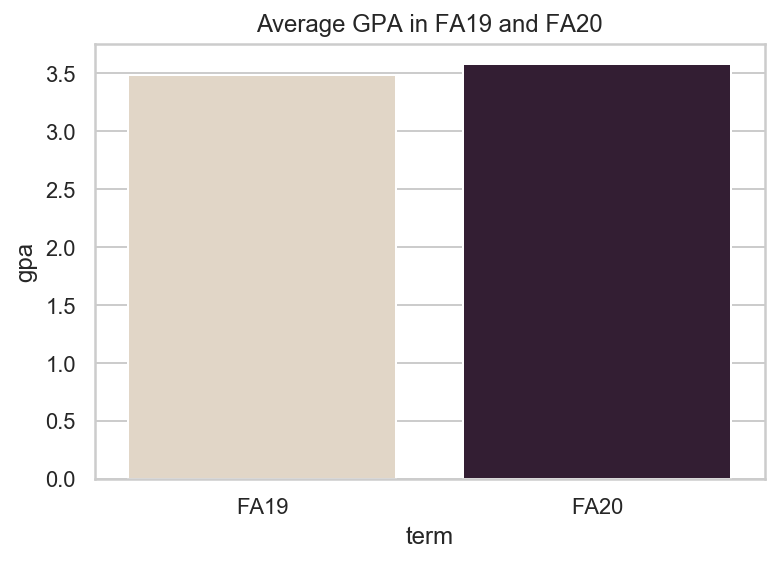

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="term", y="gpa", data=to_compare,palette="ch:.25")
plt.title('Average GPA in FA19 and FA20')

Text(0.5, 1.0, 'Average GPA students got across the whole data')

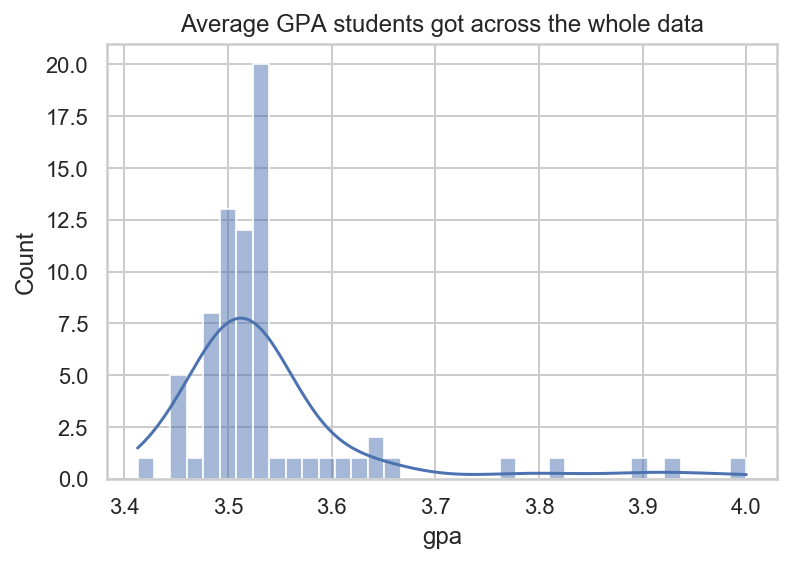

In [35]:
ax = sns.histplot(x='gpa', data=allgpa, kde=True)
ax.set_title("Average GPA students got across the whole data")

# Study hours

In [36]:
hours = cape.groupby('Term').agg(['mean'])
hours

,Enroll,Evals Made,Study Hrs/wk,eval_percent
,mean,mean,mean,mean
Term,,,,
FA07,85.271167,53.110984,4.849657,0.712589
FA08,82.148594,50.173695,4.863353,0.708521
FA09,89.495565,54.972284,4.820942,0.697052
FA10,84.222328,41.612595,5.656613,0.515282
FA11,83.681731,40.396154,5.778365,0.506676
...,...,...,...,...
WI16,85.484105,47.947321,5.524950,0.558216
WI17,84.394402,45.247668,5.547201,0.540375


In [37]:
studyhr = hours['Study Hrs/wk'].sort_values('mean', ascending = False).reset_index()
studyhr

,Term,mean
0,S313,11.188333
1,S315,9.914000
2,S311,9.780714
3,S312,9.736250
4,S316,9.018000
...,...,...
69,FA09,4.820942
70,WI09,4.803462
71,SP09,4.734343
72,SP08,4.709350


# Big point: need to drop the Term start with "S", which means the summer session

In [38]:
non_ss = list(filter(lambda x: 'S' not in x, studyhr['Term']))
len(non_ss)

27

In [39]:
sp = list(filter(lambda x: 'SP' in x, studyhr['Term']))
sp

['SP20',
 'SP12',
 'SP11',
 'SP19',
 'SP18',
 'SP16',
 'SP17',
 'SP15',
 'SP14',
 'SP10',
 'SP13',
 'SP09',
 'SP08']

In [40]:
quarters = non_ss + sp
len(quarters)

40

In [41]:
studyhr.set_index('Term')

,mean
Term,
S313,11.188333
S315,9.914000
S311,9.780714
S312,9.736250
S316,9.018000
...,...
FA09,4.820942
WI09,4.803462
SP09,4.734343


In [42]:
studyhr = hours['Study Hrs/wk'].sort_values('mean', ascending = False).reset_index()
studyhr.head()

,Term,mean
0,S313,11.188333
1,S315,9.914000
2,S311,9.780714
3,S312,9.736250
4,S316,9.018000


In [43]:
notss = pd.DataFrame().assign(
    term = quarters,
)
# notss = notss.set_index('Term')
notss.head()

,term
0,WI12
1,FA20
2,WI11
3,FA11
4,FA10


In [44]:
all_quarters = studyhr.merge(notss, left_on='Term', right_on='term')
all_quarters.head()

,Term,mean,term
0,WI12,5.874388,WI12
1,SP20,5.837978,SP20
2,SP12,5.794844,SP12
3,FA20,5.791604,FA20
4,WI11,5.785186,WI11


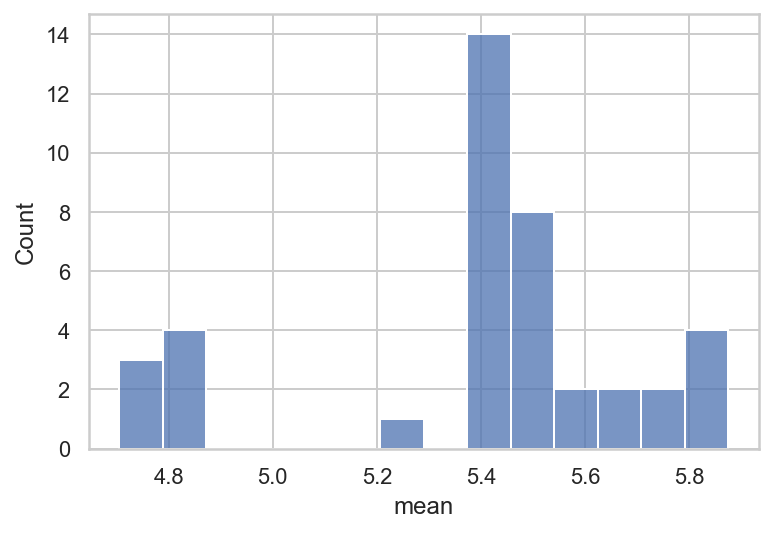

In [45]:
sns.histplot(data = all_quarters, x = 'mean')

In [46]:
all_quarters.head()

,Term,mean,term
0,WI12,5.874388,WI12
1,SP20,5.837978,SP20
2,SP12,5.794844,SP12
3,FA20,5.791604,FA20
4,WI11,5.785186,WI11


Text(0.5, 1, 'Average Study hour Changes at UCSD for all existing data')

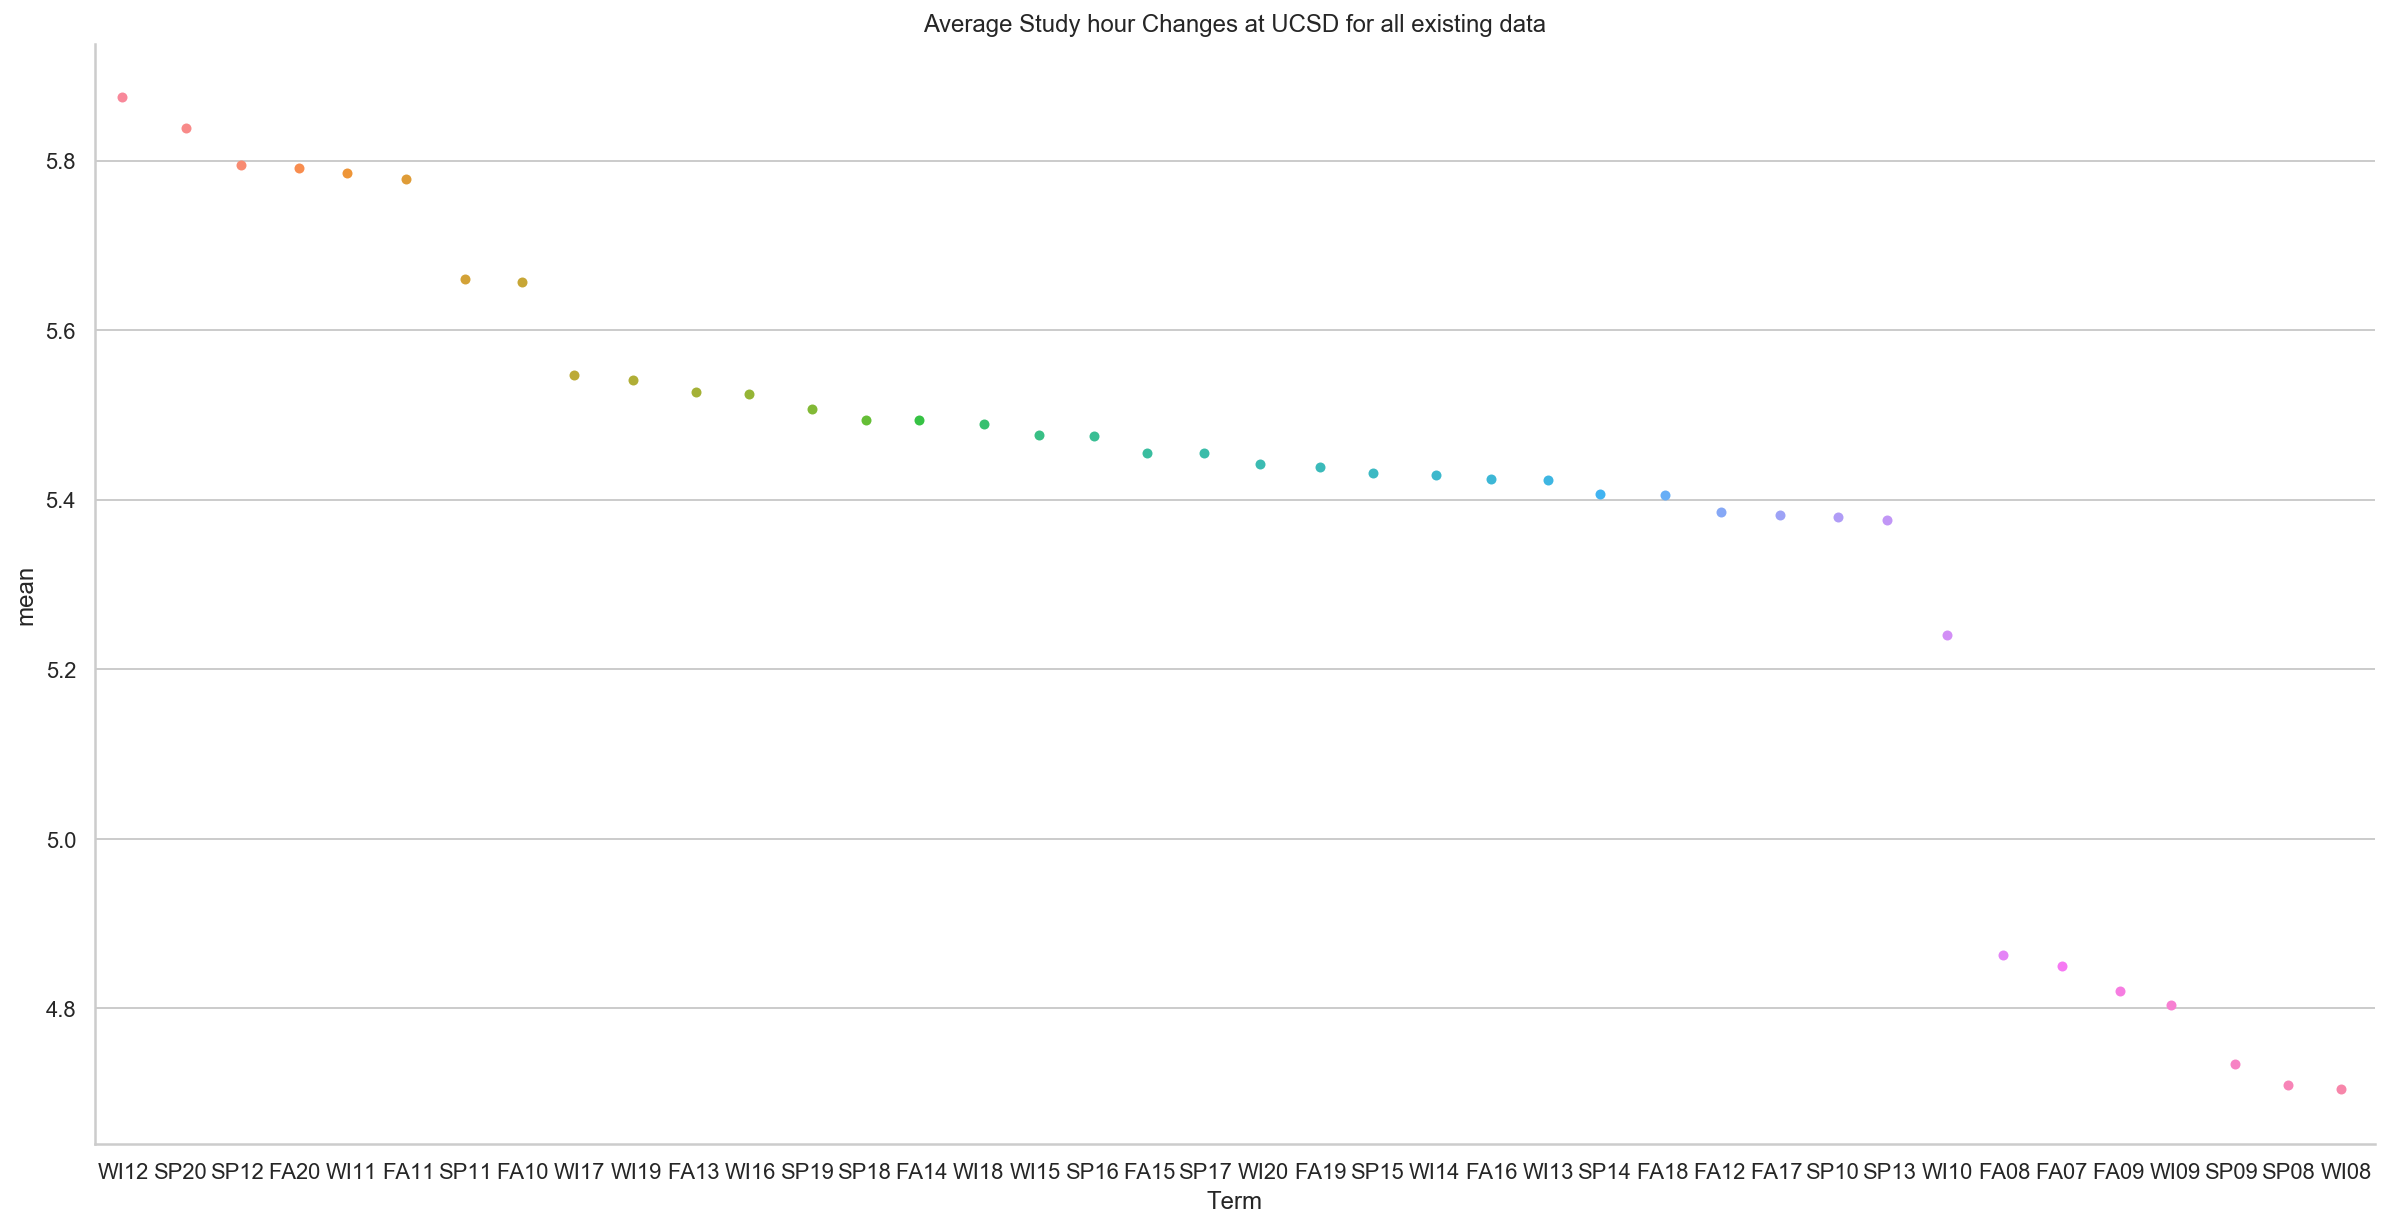

In [47]:
sns.catplot(x="Term", y="mean", data=all_quarters,height=8.27, aspect=2)
plt.title('Average Study hour Changes at UCSD for all existing data')

## DSC avg time per course

In [48]:
dsc = cape[cape['department'] == "DSC"]
dsc.groupby('course_code').agg('mean').sort_values(by='Study Hrs/wk', ascending=False)

,Enroll,Evals Made,Study Hrs/wk,eval_percent
course_code,,,,
DSC 80,74.125000,24.500000,14.086250,0.318815
DSC 30,105.857143,41.428571,13.431429,0.376291
DSC 106,107.750000,38.750000,11.230000,0.358413
DSC 102,110.500000,70.000000,11.105000,0.562434
DSC 20,112.666667,47.777778,10.553333,0.422751
DSC 170,40.000000,11.000000,10.133333,0.282382
DSC 180A,74.000000,20.500000,9.447500,0.301608
DSC 120,68.000000,19.000000,9.390000,0.279412
DSC 155,9.000000,7.000000,8.790000,0.777778
